In [2]:
!pip install ultralytics

In [4]:
import ultralytics

from ultralytics import YOLO
import os
from PIL import Image
import cv2
from IPython.display import Video
import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


ultralytics.checks()

Ultralytics 8.3.23  Python-3.12.4 torch-2.5.0+cpu CPU (AMD Ryzen 5 7535HS with Radeon Graphics)
Setup complete  (12 CPUs, 15.2 GB RAM, 462.0/466.0 GB disk)


In [4]:
model = YOLO('yolov8s.pt')

In [5]:
Root_dir = '/kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces'
Root_dir = 'C:/Users/maxim/Desktop/pfo/resources/yolov8'

# C:\Users\maxim\Desktop\pfo\resources\yolov8\data.yaml

In [6]:
yaml_path = os.path.join(Root_dir, 'data.yaml')

In [7]:
train_path = os.path.join(Root_dir, 'train', 'images')
valid_path = os.path.join(Root_dir, 'valid', 'images')
# valid_path = os.path.join(Root_dir, 'test', 'images')

* **[Table of Content](#0)**

In [8]:
results = model.train(
    data=yaml_path,
    epochs=2,
    batch=32,
    lr0=0.0001, 
    lrf=0.1,
    imgsz=640,
    plots= True
)

Ultralytics 8.3.23  Python-3.12.4 torch-2.5.0+cpu CPU (AMD Ryzen 5 7535HS with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/maxim/Desktop/pfo/resources/yolov8\data.yaml, epochs=2, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning C:\Users\maxim\Desktop\pfo\resources\yolov8\train\labels.cache... 1583 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1583/1583 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 887, len(boxes) = 14542. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\maxim\Desktop\pfo\resources\yolov8\valid\labels.cache... 155 images, 0 backgrounds, 0 corrupt: 100%|██████████| 155/155 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 75, len(boxes) = 1478. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G      2.055      2.879      1.642        175        640: 100%|██████████| 50/50 [15:23<00:00, 18.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.90s/it]

                   all        155       1478      0.679      0.384       0.39      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G      1.576      1.265      1.327        194        640: 100%|██████████| 50/50 [17:23<00:00, 20.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:40<00:00, 13.42s/it]

                   all        155       1478      0.807      0.517      0.558      0.327



2 epochs completed in 0.571 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 22.5MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics 8.3.23  Python-3.12.4 torch-2.5.0+cpu CPU (AMD Ryzen 5 7535HS with Radeon Graphics)
Model summary (fused): 168 layers, 11,131,002 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:36<00:00, 12.06s/it]


                   all        155       1478      0.807      0.517      0.558      0.327
                Bunker         21         29      0.765      0.787       0.83       0.45
                 Cargo          1          3          1          0          0          0
               Cistern          6         30        0.6     0.0534       0.24     0.0557
         ClassCarriage        126        244      0.768      0.885       0.88      0.387
               Dumpcar         27         41      0.964      0.651       0.74      0.438
       Fitting platorm        129        406      0.565       0.81      0.767      0.352
          Halfcarriage          3          9          1      0.779      0.984      0.608
          Laying crane        120        144      0.668      0.917      0.852      0.567
                  MTSO          5          6          1          0     0.0454     0.0183
          PRSM Machine         20         24      0.544      0.625      0.706      0.514
          Platform PP

In [13]:
data_dir = "C:/Users/maxim/Desktop/pfo/resources/yolov8/train"
img_dir = os.path.join(data_dir, '*g')
files = glob.glob(img_dir)
imgs = []
for image in files:
    img = cv2.imread(image)
    imgs.append(img)
    plt.figure(figsize=(10,10), dpi= 200)
    plt.imshow(img)


0: 640x640 1 Laying crane, 1 SMMachine, 80.6ms
Speed: 5.5ms preprocess, 80.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
SMMachine:  1
Laying crane:  1


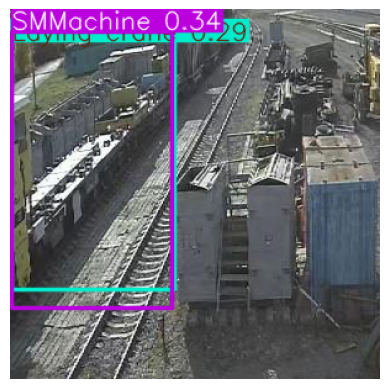

('output3.jpg', Counter({11.0: 1, 7.0: 1}))

In [18]:
import cv2
import matplotlib.pyplot as plt
from collections import Counter
from ultralytics import YOLO

def addedPredict(imagePath, savePath, model, printMode=0, roi=None):
    image = cv2.imread(imagePath)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    if roi is not None:
        x1, y1, x2, y2 = roi
        region_of_interest = image_rgb[y1:y2, x1:x2]
        results = model.predict(source=region_of_interest, imgsz=640)

        cropped_save_path = savePath.replace(".jpg", "_cropped.jpg")
        cv2.imwrite(cropped_save_path, cv2.cvtColor(region_of_interest, cv2.COLOR_RGB2BGR))
    else:
        results = model.predict(source=image_rgb, imgsz=640)

    predicted_classes = results[0].boxes.cls.cpu().numpy() 
    class_counts = Counter(predicted_classes)

    class_names = ['Bunker', 'Cargo', 'Cistern', 'ClassCarriage', 'Dumpcar',
                   'Fitting platorm', 'Halfcarriage', 'Laying crane', 'MTSO',
                   'PRSM Machine', 'Platform PPK', 'SMMachine', 'Sapsan', 'USOPlatform']

    for class_id, count in class_counts.items():
        print(f"{class_names[int(class_id)]}:  {count}")

    # Отображение результата
    test_image = results[0].plot(line_width=2)
    plt.imshow(test_image)
    results[0].save(savePath)
    
    if printMode == 1:
        plt.axis('off')
        plt.show()
    
    return cropped_save_path if roi else savePath, class_counts

model = YOLO("C:/Users/maxim/Desktop/pfo/resources/models/yolov8/best.pt")
image_test_path = 'C:/Users/maxim/Desktop/pfo/resources/yolov8/train/images/1_fixed_mp4-0005_jpg.rf.fbb81706e08ae705493e2737d9cc19e4.jpg'
save_path = "output3.jpg"


roi = [100, 100, 400, 400] 
predict(image_test_path, save_path, model, printMode=1, roi=roi)




In [11]:
example_video_path = 'C:/Users/maxim/Desktop/pfo/resources/20241011125222921_d700c44db5524303970688d087e40afa_AC1418956.mp4'

video_output = model.predict(source=example_video_path, conf=0.6,save=True)
# video_output = model.track("https://youtu.be/LNwODJXcvt4", show=True)

FileNotFoundError: /kaggle/input/chess-pieces-detection-image-dataset/Chess_pieces/Chess_video_example.mp4 does not exist

In [ ]:
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/train2/Chess_video_example.avi Chess_video_example.mp4

Video("Chess_video_example.mp4", embed=True, width=960)